In [7]:
import os
import torch
from torch import nn
import pandas as pd

from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image

import matplotlib.pyplot as plt

- Loading the dataset
- Iterating and Visualizing the Dataset
- Creating a custon dataset for your files
- Preparing data for training with DataLoaders
- Iterate through the DataLoader

## Loading the dataset

In [2]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

## Iterating and Visualizing the Dataset

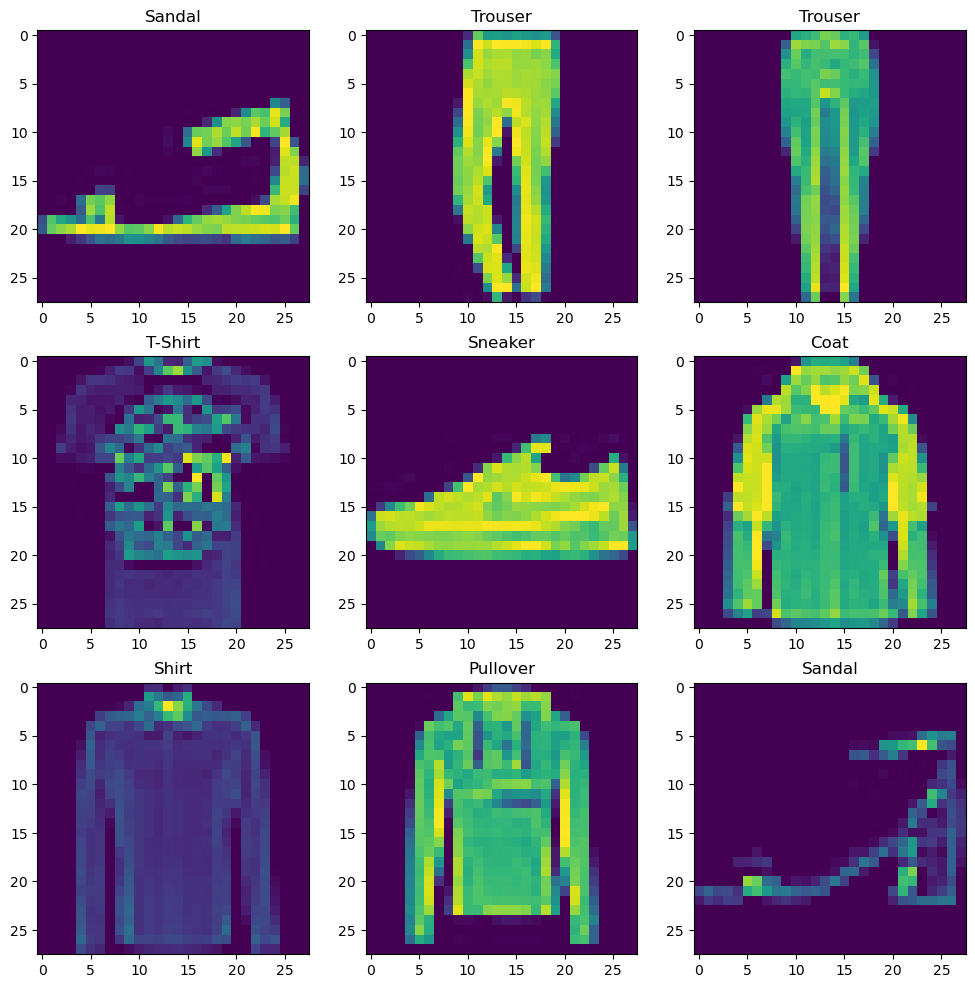

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(12, 12))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
    index = torch.randint(0, len(train_dataset), size=(1,)).item()
    img, label = train_dataset[index]
    figure.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(f"{labels_map[label]}")

plt.show()

## Creating custom dataset for your files

Must implement functions:
- __init__: Instantiating the Dataset object, and initializing the objects
- __len__: return length/number of samples in our dataset
- __getitem__: loads and returns a sample from the dataset at the given index idx. Convert image to tensor, calls transform functions on them(if applicable), and returns tensor image

In [8]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, image_dir, transform=None, target_trasnform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = image_dir
        self.transform = transform
        self.target_transform = target_trasnform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders

Helpful in passing data to model in mini-batches, reshuffling at every epoch to reduce overfitting and use multiprocessing to speed up the data retrieval. 

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1a44a69b8f0>,
 <torch.utils.data.dataloader.DataLoader at 0x1a44b57b7a0>)

In [11]:
for X, y in train_dataloader:
    print(X, y)
    print(X.shape, y.shape, len(X))
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

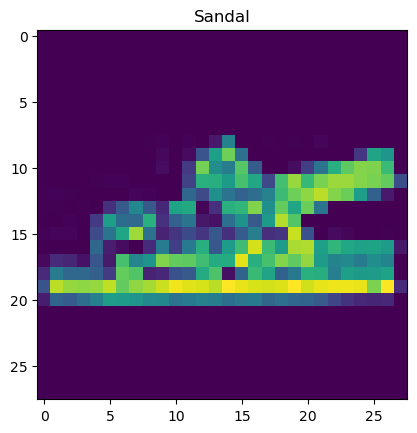

In [16]:
for X, y in train_dataloader:
    plt.imshow(X[0].squeeze())
    plt.title(labels_map[y[0].item()])
    break